In [1]:
import tensorflow as tf
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

In [2]:
df = pd.read_csv('FuelConsumption.csv')

In [3]:
df.head()

,MODELYEAR,MAKE,MODEL,VEHICLECLASS,ENGINESIZE,CYLINDERS,TRANSMISSION,FUELTYPE,FUELCONSUMPTION_CITY,FUELCONSUMPTION_HWY,FUELCONSUMPTION_COMB,FUELCONSUMPTION_COMB_MPG,CO2EMISSIONS
0,2014,ACURA,ILX,COMPACT,2.0,4,AS5,Z,9.9,6.7,8.5,33,196
1,2014,ACURA,ILX,COMPACT,2.4,4,M6,Z,11.2,7.7,9.6,29,221
2,2014,ACURA,ILX HYBRID,COMPACT,1.5,4,AV7,Z,6.0,5.8,5.9,48,136
3,2014,ACURA,MDX 4WD,SUV - SMALL,3.5,6,AS6,Z,12.7,9.1,11.1,25,255
4,2014,ACURA,RDX AWD,SUV - SMALL,3.5,6,AS6,Z,12.1,8.7,10.6,27,244


In [4]:
df.dtypes

MODELYEAR                     int64
MAKE                         object
MODEL                        object
VEHICLECLASS                 object
ENGINESIZE                  float64
CYLINDERS                     int64
TRANSMISSION                 object
FUELTYPE                     object
FUELCONSUMPTION_CITY        float64
FUELCONSUMPTION_HWY         float64
FUELCONSUMPTION_COMB        float64
FUELCONSUMPTION_COMB_MPG      int64
CO2EMISSIONS                  int64
dtype: object

In [5]:
df = df[['ENGINESIZE','CYLINDERS','FUELCONSUMPTION_CITY','FUELCONSUMPTION_HWY','FUELCONSUMPTION_COMB',
       'FUELCONSUMPTION_COMB_MPG','CO2EMISSIONS']]
df.head()

,ENGINESIZE,CYLINDERS,FUELCONSUMPTION_CITY,FUELCONSUMPTION_HWY,FUELCONSUMPTION_COMB,FUELCONSUMPTION_COMB_MPG,CO2EMISSIONS
0,2.0,4,9.9,6.7,8.5,33,196
1,2.4,4,11.2,7.7,9.6,29,221
2,1.5,4,6.0,5.8,5.9,48,136
3,3.5,6,12.7,9.1,11.1,25,255
4,3.5,6,12.1,8.7,10.6,27,244


In [6]:
df1 = df[['ENGINESIZE','CYLINDERS']]
df1.head()

,ENGINESIZE,CYLINDERS
0,2.0,4
1,2.4,4
2,1.5,4
3,3.5,6
4,3.5,6


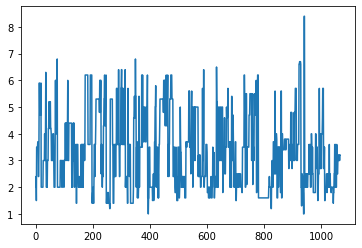

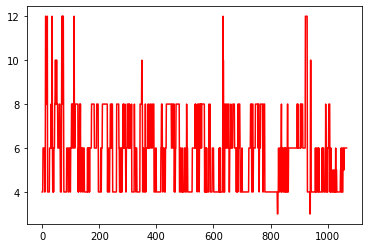

[]

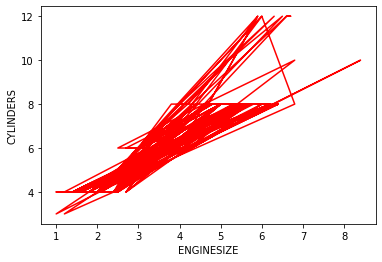

In [7]:
plt.plot(df[['ENGINESIZE']])
plt.show()
plt.plot(df[['CYLINDERS']],color = 'red')
plt.show()
plt.plot(df[['ENGINESIZE']],df[['CYLINDERS']],color = 'red')
plt.xlabel('ENGINESIZE')
plt.ylabel('CYLINDERS')
plt.plot()

In [8]:
X = np.array(df1)
X

array([[2. , 4. ],
       [2.4, 4. ],
       [1.5, 4. ],
       ...,
       [3. , 6. ],
       [3.2, 6. ],
       [3.2, 6. ]])

In [9]:
df2 = df[['CO2EMISSIONS']]
df2.head()

,CO2EMISSIONS
0,196
1,221
2,136
3,255
4,244


In [10]:
Y = np.array(df2)
Y

array([[196],
       [221],
       [136],
       ...,
       [271],
       [260],
       [294]], dtype=int64)

In [11]:
df.index

RangeIndex(start=0, stop=1067, step=1)

In [ ]:
a = int(1067*0.8)

In [ ]:
a

In [ ]:
b = 1067 - a

In [ ]:
b

In [12]:
import sklearn
from sklearn.model_selection import train_test_split
from sklearn import preprocessing

In [31]:
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.2)

print(X_train.shape)
print(X_test.shape)

(853, 2)
(214, 2)


In [14]:
print(y_train.shape)

(853, 1)


In [15]:
print(y_test.shape)

(214, 1)


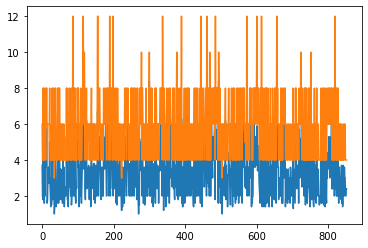

In [16]:
plt.plot(X_train)
plt.show()

In [33]:
np.max(X_train.T[0])

8.4

In [34]:
np.max(X_train.T[1])

12.0

In [35]:
X_train.T[0] /= 8.4
X_train.T[1] /= 12.0

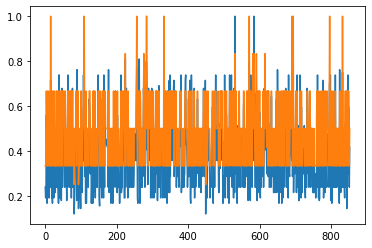

In [36]:
plt.plot(X_train)
plt.show()

In [ ]:
normaliser = preprocessing.Normalizer()
X_train_normalised = normaliser.fit_transform(X_train)
X_test_normalised = normaliser.fit_transform(X_test)

In [ ]:
plt.plot(X_train_normalised)
plt.show()

In [41]:
 from sklearn.linear_model import LinearRegression

In [42]:
reg = LinearRegression().fit(X_train, y_train)

In [44]:
reg.score(X_train,y_train)

0.7650268544796253

In [47]:
np.max(X_test.T[0])

6.7

In [48]:
np.max(X_test.T[1])

12.0

In [49]:
X_test.T[0] /= 6.7
X_test.T[1] /= 12.0

In [50]:
reg.score(X_test,y_test)

0.6364760822545079